<a href="https://colab.research.google.com/github/alisa0040/sales-forecast-ml-pipeline/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 5)

train = pd.read_csv("data/train.csv", parse_dates=["Date"])
store = pd.read_csv("data/store.csv")

df = pd.merge(train, store, on="Store", how="left")

df.shape
df.head()

/tmp/ipython-input-22-298522700.py:8: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("data/train.csv", parse_dates=["Date"])


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [ ]:
print("Unique values in StateHoliday:", df["StateHoliday"].unique())

Unique values in StateHoliday: ['0' 'a' 'b' 'c' 0]


In [ ]:
# Convert all values to strings and unify '0' and 0
df["StateHoliday"] = df["StateHoliday"].astype(str)

In [ ]:
df.isna().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


In [ ]:
import numpy as np

df["CompetitionDistance"] = df["CompetitionDistance"].fillna(df["CompetitionDistance"].median())
df["CompetitionOpenSinceMonth"] = df["CompetitionOpenSinceMonth"].fillna(0)
df["CompetitionOpenSinceYear"] = df["CompetitionOpenSinceYear"].fillna(0)
df["Promo2SinceWeek"] = df["Promo2SinceWeek"].fillna(0)
df["Promo2SinceYear"] = df["Promo2SinceYear"].fillna(0)
df["PromoInterval"] = df["PromoInterval"].fillna("")

print("✅ Remaining NaNs:", df.isna().sum().sum())

✅ Remaining NaNs: 0


In [ ]:
df.describe()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,2014-04-11 01:30:42.846061824,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422034e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03
min,1.000000e+00,1.000000e+00,2013-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,2013-08-17 00:00:00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,2014-04-02 00:00:00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,2014-12-12 00:00:00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,2015-07-31 00:00:00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706913e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03


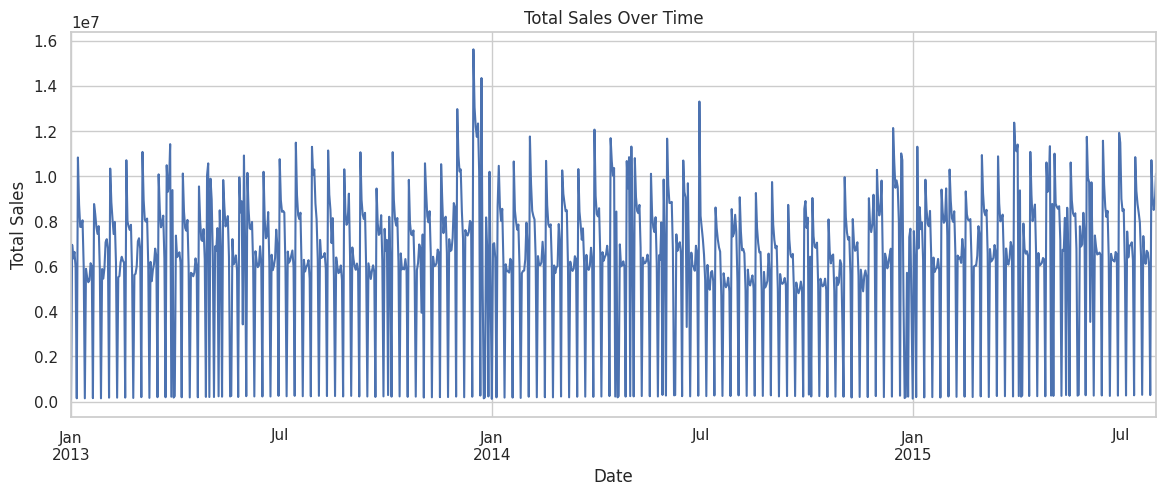

In [ ]:
# Total sales aggregated by date
sales_by_date = df.groupby("Date")["Sales"].sum()

# Plot the total sales over time
sales_by_date.plot(title="Total Sales Over Time")
plt.ylabel("Total Sales")
plt.xlabel("Date")
plt.show()

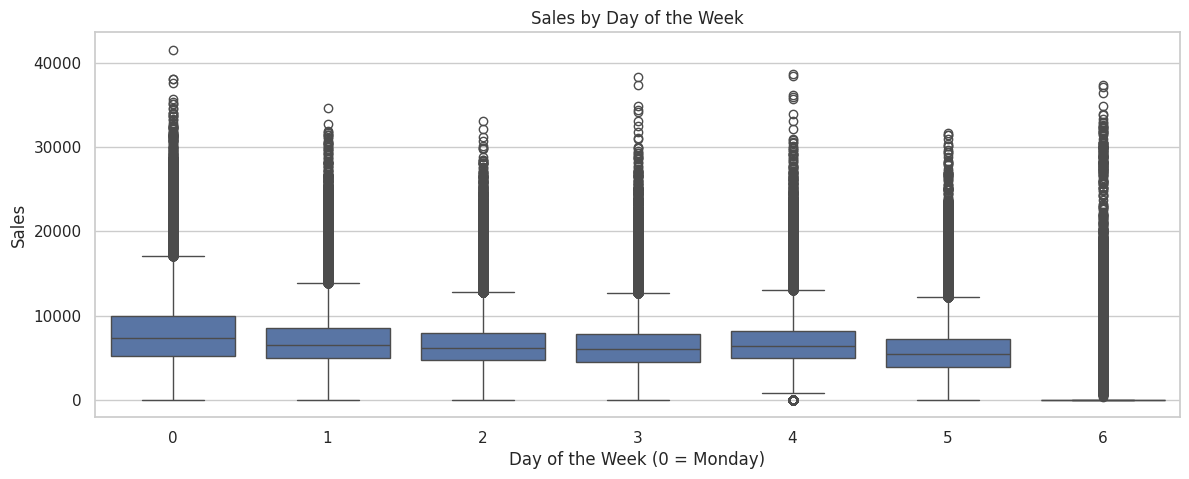

In [ ]:
# Extract the day of the week (0 = Monday, 6 = Sunday)
df["DayOfWeek"] = df["Date"].dt.dayofweek

# Boxplot of sales by day of the week
sns.boxplot(x="DayOfWeek", y="Sales", data=df)
plt.title("Sales by Day of the Week")
plt.xlabel("Day of the Week (0 = Monday)")
plt.ylabel("Sales")
plt.show()

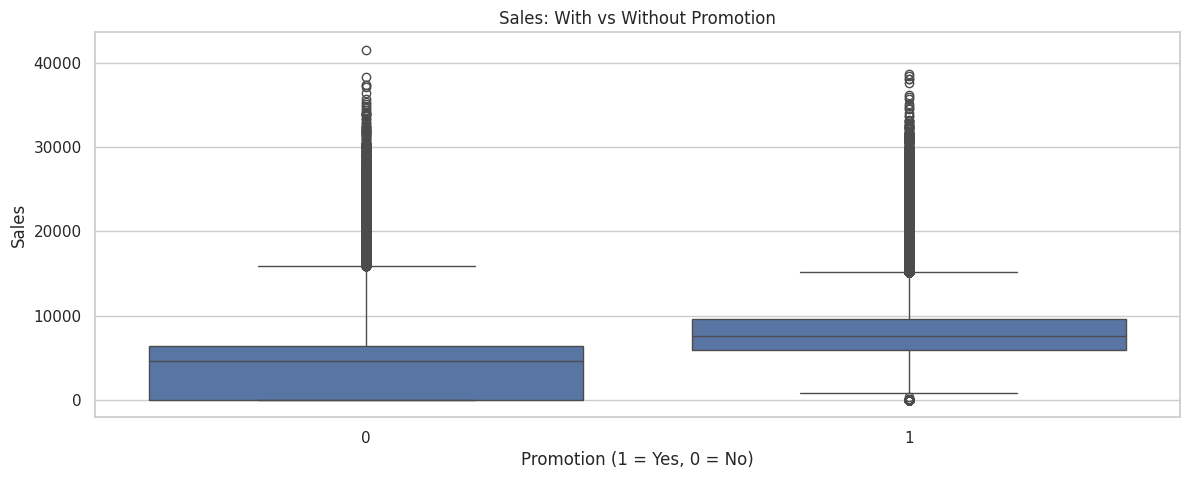

In [ ]:
# Boxplot: Sales with and without promotions
sns.boxplot(x="Promo", y="Sales", data=df)
plt.title("Sales: With vs Without Promotion")
plt.xlabel("Promotion (1 = Yes, 0 = No)")
plt.ylabel("Sales")
plt.show()

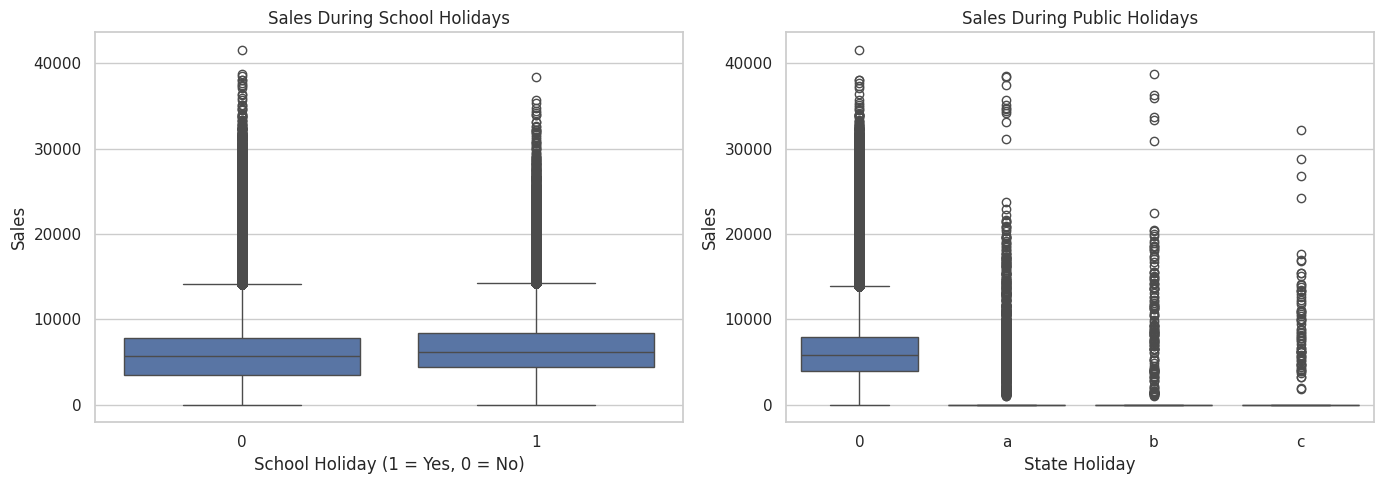

In [ ]:
# Side-by-side boxplots: Sales during school and state holidays
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(x="SchoolHoliday", y="Sales", data=df, ax=axs[0])
axs[0].set_title("Sales During School Holidays")
axs[0].set_xlabel("School Holiday (1 = Yes, 0 = No)")
axs[0].set_ylabel("Sales")

sns.boxplot(x="StateHoliday", y="Sales", data=df, ax=axs[1])
axs[1].set_title("Sales During Public Holidays")
axs[1].set_xlabel("State Holiday")

plt.tight_layout()
plt.show()

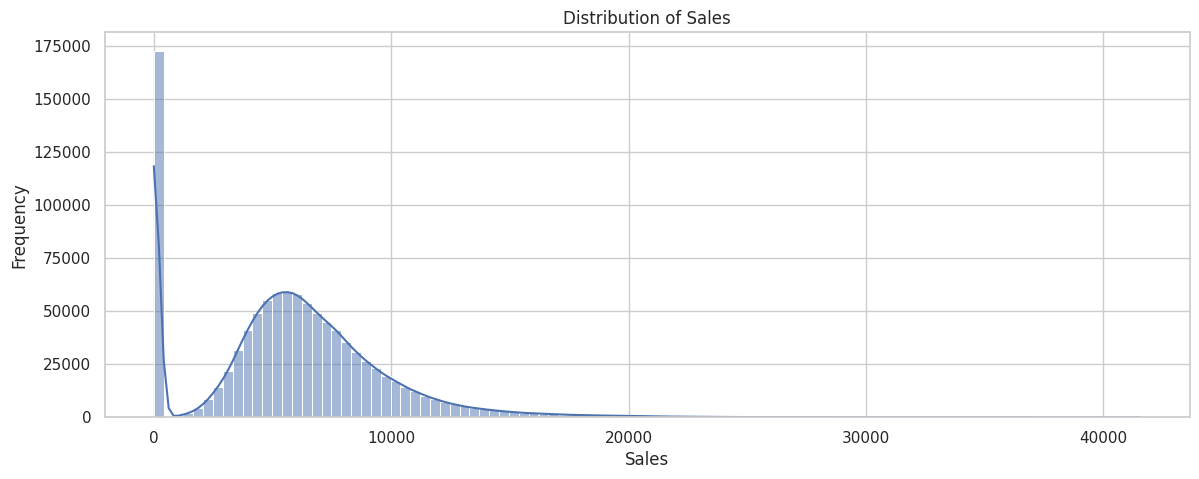

In [ ]:
# Distribution of sales values
sns.histplot(df["Sales"], bins=100, kde=True)
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

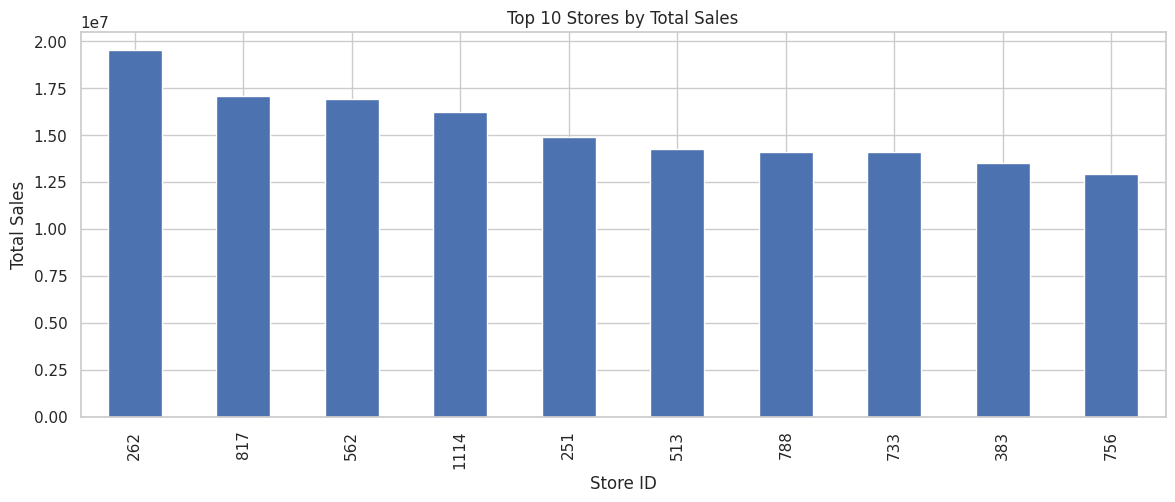

In [ ]:
#Top 10 stores by total sales
top_stores = df.groupby("Store")["Sales"].sum().sort_values(ascending=False)
top_stores.head(10).plot(kind="bar", title="Top 10 Stores by Total Sales")
plt.ylabel("Total Sales")
plt.xlabel("Store ID")
plt.show()